<a href="https://colab.research.google.com/github/nericovich/project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект для задачи Яндекс Лицея "Анализ экологических проблем"

### На заводе по производству полезного полимера ООО “Synthesising the future“ обратились за помощью в исследовании зависимостей вредных выбросов от производственных показателей. Требуется повести анализ данных и построить выводы о том, какой этап имеет высокий риск создать повышенное содержания вредного газа.


## Импорты

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import mannwhitneyu, ttest_ind, shapiro
import numpy as np

In [2]:
df = pd.read_csv('data.csv', sep=',', decimal='.', skipinitialspace=True)

## Main


### Обработка

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.shape)
df = df.dropna(subset=['stage_4_output_danger_gas'])
df = df.reset_index(drop=True)
df

(4400, 24)


,datetime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,stage_2_output_top_temp,...,stage_3_output_temp_hum_steam,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift
0,2021-01-28 21:00:00,67.93,90.24,473.59,75.26,97.79,49.33,356.74,249.87,97.50,...,108.63,45.87,156.41,19.36,5.97,339.99,0.16,21.48,46.01,2.0
1,2021-01-29 01:00:00,71.23,105.97,475.01,76.90,98.28,51.24,370.37,260.85,98.14,...,108.26,45.74,156.46,22.93,5.73,319.95,0.15,21.98,52.55,2.0
2,2021-01-29 08:00:00,68.83,106.60,471.56,76.74,NaN,49.14,359.06,248.59,NaN,...,109.49,46.10,156.18,17.95,5.73,258.98,0.13,22.58,42.99,1.0
3,2021-01-29 21:00:00,68.73,104.05,465.82,75.31,96.24,45.14,341.09,224.87,96.27,...,108.08,45.84,156.62,15.20,5.88,319.02,0.14,20.78,43.67,1.0
4,2021-01-30 01:00:00,66.03,103.28,468.38,77.53,96.48,52.44,373.44,267.24,96.80,...,109.20,45.99,156.51,18.52,5.71,297.12,0.15,21.28,47.43,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,2023-03-19 12:00:00,67.33,43.32,409.32,82.00,105.65,69.35,771.29,223.71,97.37,...,111.26,41.04,152.90,22.69,4.14,381.37,0.20,21.18,9.17,2.0
930,2023-03-20 00:00:00,68.83,62.24,377.84,79.82,104.80,61.08,781.76,183.36,97.70,...,110.09,46.40,152.53,21.38,4.15,381.77,0.14,21.08,10.79,2.0
931,2023-03-20 12:00:00,66.83,61.92,397.95,81.19,105.50,66.26,776.52,227.64,98.31,...,108.65,45.99,152.53,21.78,4.14,391.60,0.20,21.08,9.27,1.0
932,2023-03-21 01:00:00,70.03,62.80,378.37,79.16,110.50,63.16,845.66,223.15,103.01,...,108.18,47.70,151.80,22.44,3.66,460.04,0.18,22.38,10.11,1.0


In [4]:
df.shape

(934, 24)

In [5]:
df.dtypes

datetime                                 object
stage_1_output_konv_avd                 float64
stage_2_input_water_sum                 float64
stage_2_output_bottom_pressure          float64
stage_2_output_bottom_temp              float64
stage_2_output_bottom_temp_hum_steam    float64
stage_2_output_bottom_vacuum            float64
stage_2_output_top_pressure             float64
stage_2_output_top_pressure_at_end      float64
stage_2_output_top_temp                 float64
stage_2_output_top_vacuum               float64
stage_3_input_pressure                  float64
stage_3_input_soft_water                float64
stage_3_input_steam                     float64
stage_3_output_temp_hum_steam           float64
stage_3_output_temp_top                 float64
stage_4_input_overheated_steam          float64
stage_4_input_polymer                   float64
stage_4_input_steam                     float64
stage_4_input_water                     float64
stage_4_output_danger_gas               

#### Пропуски

In [6]:
df.isna().sum()

datetime                                 0
stage_1_output_konv_avd                 12
stage_2_input_water_sum                 15
stage_2_output_bottom_pressure          18
stage_2_output_bottom_temp               8
stage_2_output_bottom_temp_hum_steam     4
stage_2_output_bottom_vacuum            24
stage_2_output_top_pressure              4
stage_2_output_top_pressure_at_end       1
stage_2_output_top_temp                  9
stage_2_output_top_vacuum               10
stage_3_input_pressure                  17
stage_3_input_soft_water                10
stage_3_input_steam                      1
stage_3_output_temp_hum_steam            2
stage_3_output_temp_top                 14
stage_4_input_overheated_steam           2
stage_4_input_polymer                   10
stage_4_input_steam                     26
stage_4_input_water                     21
stage_4_output_danger_gas                0
stage_4_output_dry_residue_avg           0
stage_4_output_product                   0
work_shift 

Надо что-то сделать со всеми, кроме stage_4_output_danger_gas

In [7]:
df[df['work_shift'].isna()]

,datetime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,stage_2_output_top_temp,...,stage_3_output_temp_hum_steam,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift


Пропуски везде - можно удалить

In [8]:
print(df.shape)
df = df.dropna(subset=['work_shift'])
# мы не можем позволить себе потенциально удалять искомый фактор danger_gas, тогда
# df = df[(df['work_shift'].isna()) & (df['stage_4_output_danger_gas'].notna())]
# df = df.query('stage_4_output_danger_gas.notna() and work_shift.isna()')
print(df.shape)
# print(df['work_shift'].isna().sum())
df['work_shift'].value_counts()

(934, 24)
(934, 24)


work_shift
1.0    475
2.0    459
Name: count, dtype: int64

Проверим stage_4_output_product и stage_4_output_dry_residue_avg у них тоже было по 160 пропусков

In [9]:
print(df['stage_4_output_product'].isna().sum())
df['stage_4_output_dry_residue_avg'].isna().sum()

0


0

In [10]:
print(df['stage_4_input_water'].isna().sum())
df[df['stage_4_input_water'].isna()]

21


,datetime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,stage_2_output_top_temp,...,stage_3_output_temp_hum_steam,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift
11,2021-02-01 16:00:00,69.33,122.41,470.79,81.63,93.33,46.68,414.94,211.51,99.18,...,110.37,44.59,156.63,11.18,7.74,NaN,0.24,22.88,37.22,2.0
118,2021-03-19 01:00:00,68.43,117.38,446.81,77.15,123.15,53.06,408.25,289.38,99.47,...,111.18,38.82,154.56,21.16,4.98,NaN,0.11,22.58,65.90,1.0
130,2021-03-24 08:00:00,71.83,80.05,313.33,74.63,104.88,50.06,397.21,282.51,94.63,...,109.43,37.62,155.51,18.42,3.99,NaN,0.12,21.88,66.30,2.0
214,2021-08-07 08:00:00,72.63,122.90,496.73,80.26,89.15,55.96,388.11,292.56,95.85,...,111.65,48.36,153.43,20.51,5.98,NaN,0.07,21.28,59.55,2.0
218,2021-09-09 13:00:00,68.63,116.46,359.21,78.63,102.68,57.38,437.97,266.50,96.20,...,109.95,46.55,153.41,21.28,5.49,NaN,0.11,21.78,69.33,2.0
264,2021-11-28 17:00:00,71.63,75.03,387.27,80.91,117.58,65.51,433.09,304.55,97.63,...,107.75,46.46,153.41,20.49,6.08,NaN,0.13,22.38,54.18,2.0
346,2021-12-21 09:00:00,70.73,61.20,463.05,80.48,100.86,60.80,461.21,299.41,98.91,...,111.40,43.68,151.61,20.54,6.42,NaN,0.19,23.58,50.66,2.0
446,2022-02-26 20:00:00,67.33,100.65,475.91,79.04,97.91,54.50,420.48,249.06,94.45,...,112.72,43.21,153.56,23.49,6.36,NaN,0.13,24.68,42.26,1.0
473,2022-03-12 21:00:00,72.93,69.95,340.52,77.52,94.79,59.06,429.08,291.79,95.69,...,111.04,41.30,153.73,18.76,4.69,NaN,0.20,22.78,45.26,2.0
483,2022-03-17 21:00:00,74.83,69.46,346.06,78.30,87.41,59.53,375.73,567.82,96.17,...,109.11,41.26,153.57,18.45,5.47,NaN,0.20,24.48,33.74,1.0


Вероятно, ошибки или сбои, тк воду точно подавали

302.10960569550934
285.56


<Axes: xlabel='stage_4_input_water', ylabel='Count'>

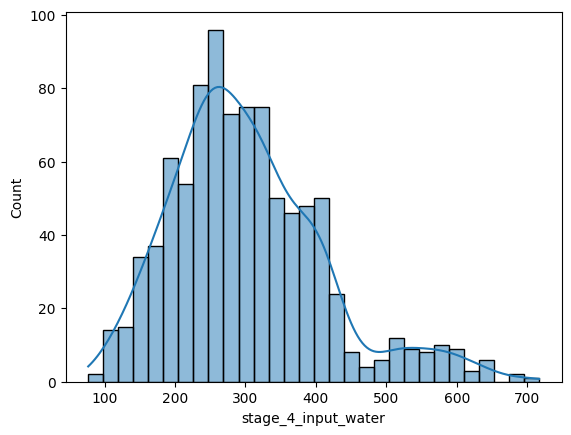

In [11]:
print(df['stage_4_input_water'].mean())
print(df['stage_4_input_water'].median())
sns.histplot(df['stage_4_input_water'], kde=True, bins=30)

Распределение назвать нормальным - трудно, но все же можно заполнить медианой

In [12]:
df['stage_4_input_water'] = df['stage_4_input_water'].fillna(df['stage_4_input_water'].median())
df['stage_4_input_water'].isna().sum()


0

stage_4_input_steam

In [13]:
df[df['stage_4_input_steam'].isna()]

,datetime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,stage_2_output_top_temp,...,stage_3_output_temp_hum_steam,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift
6,2021-01-31 00:00:00,74.63,114.53,478.53,81.46,97.90,58.06,450.41,289.65,98.35,...,NaN,47.05,156.51,26.05,NaN,449.78,0.18,22.88,55.43,1.0
16,2021-02-02 12:00:00,70.63,119.43,464.96,78.59,95.27,49.33,399.71,248.77,96.06,...,108.90,46.90,156.67,21.31,NaN,405.25,0.19,22.28,55.65,1.0
156,2021-04-02 09:00:00,68.43,83.85,347.16,76.70,103.90,55.19,425.15,308.99,96.06,...,108.82,47.18,154.53,17.66,NaN,354.98,0.09,22.48,59.06,2.0
306,2021-12-10 09:00:00,71.43,52.40,344.57,77.28,104.90,55.37,423.10,258.35,96.44,...,111.11,45.84,153.24,20.85,NaN,236.03,0.14,23.18,47.41,2.0
342,2021-12-20 21:00:00,69.73,67.44,475.73,82.44,95.95,68.06,486.30,337.55,97.57,...,111.48,43.97,151.30,22.18,NaN,265.27,0.19,23.58,52.79,1.0
362,2021-12-25 20:00:00,66.03,55.07,466.80,80.61,90.65,58.86,460.53,293.69,98.23,...,114.68,47.92,152.16,20.77,NaN,298.62,0.19,22.08,47.27,2.0
374,2021-12-29 11:00:00,72.63,59.55,463.77,80.88,89.01,64.38,482.70,324.79,96.59,...,113.77,46.59,151.89,20.41,NaN,263.02,0.16,21.18,46.09,2.0
411,2022-02-08 12:00:00,72.33,68.83,349.81,77.63,112.84,55.20,441.60,259.24,95.67,...,109.10,42.08,152.97,21.39,NaN,227.23,0.13,23.18,47.03,2.0
475,2022-03-13 21:00:00,69.83,74.27,343.14,77.77,93.00,58.82,470.47,286.67,95.68,...,111.30,41.24,153.38,19.40,NaN,252.86,0.19,22.68,38.48,1.0
481,2022-03-16 21:00:00,72.83,66.16,284.52,71.76,94.30,44.54,375.61,214.19,95.21,...,108.53,42.22,153.11,18.72,NaN,194.83,0.20,24.08,38.62,2.0


5.340594713656388
5.305


<Axes: xlabel='stage_4_input_steam', ylabel='Count'>

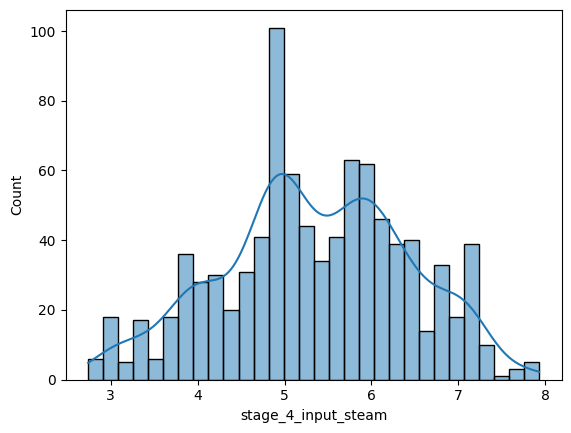

In [14]:
print(df['stage_4_input_steam'].mean())
print(df['stage_4_input_steam'].median())
sns.histplot(df['stage_4_input_steam'], kde=True, bins=30)

In [15]:
df[['stage_4_input_steam', 'stage_4_output_danger_gas']].corr(method='spearman')


,stage_4_input_steam,stage_4_output_danger_gas
stage_4_input_steam,1.000000,0.215835
stage_4_output_danger_gas,0.215835,1.000000


<Axes: xlabel='stage_4_input_steam', ylabel='stage_4_output_danger_gas'>

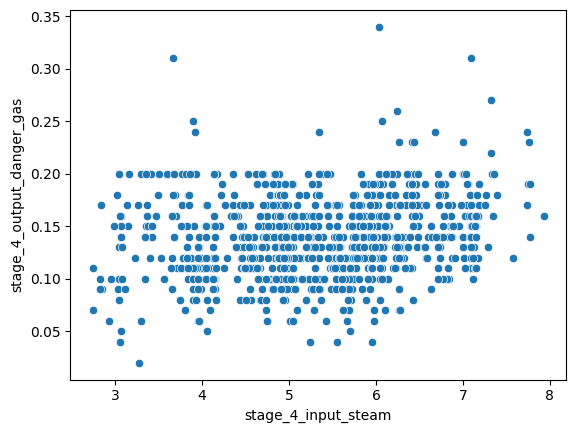

In [16]:
sns.scatterplot(x='stage_4_input_steam', y='stage_4_output_danger_gas', data=df)


Заполню медианой пожалуй)))

Распределение признака является бимодальным, что может указывать на наличие двух различных подгрупп в данных. Несмотря на это, ранговая корреляция Спирмена между признаками составляет 0.22, что говорит о слабой положительной зависимости.


In [17]:
df['stage_4_input_steam'] = df['stage_4_input_steam'].fillna(df['stage_4_input_steam'].median())
df['stage_4_input_steam'].isna().sum()

0

stage_4_input_polymer

In [18]:
df[df['stage_4_input_polymer'].isna()]

,datetime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,stage_2_output_top_temp,...,stage_3_output_temp_hum_steam,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift
13,2021-02-01 21:00:00,65.73,121.04,475.97,82.12,94.90,56.82,465.26,284.29,98.40,...,109.76,46.34,156.56,NaN,7.93,436.07,0.16,22.88,64.21,2.0
76,2021-02-23 12:00:00,71.33,113.15,453.23,79.74,92.49,53.57,473.38,280.13,97.22,...,109.08,39.83,156.74,NaN,5.67,348.85,0.12,23.48,43.81,1.0
122,2021-03-20 09:00:00,71.63,103.46,454.63,77.83,106.91,57.97,413.87,316.19,95.67,...,108.81,39.93,154.99,NaN,4.13,185.02,0.10,23.08,53.98,2.0
245,2021-11-23 13:00:00,72.43,77.73,342.22,77.89,90.38,56.18,369.12,244.12,96.09,...,108.11,43.94,152.55,NaN,6.73,385.71,0.14,22.48,60.55,2.0
293,2021-12-05 21:00:00,75.73,70.03,380.75,NaN,106.88,63.35,453.80,301.37,95.42,...,108.48,46.76,153.07,NaN,5.55,337.12,0.09,22.68,50.09,2.0
358,2021-12-24 12:00:00,73.83,42.65,458.83,81.27,102.51,61.83,477.07,305.12,99.66,...,113.89,45.30,151.83,NaN,6.52,300.69,0.17,23.08,48.90,1.0
377,2021-12-30 08:00:00,70.63,56.15,462.93,77.96,88.23,52.87,441.72,265.67,95.12,...,112.58,46.46,151.31,NaN,5.99,286.43,0.19,22.28,46.58,2.0
386,2022-01-19 08:00:00,74.33,81.28,474.36,79.97,90.10,54.62,519.98,277.69,93.17,...,121.71,40.75,153.48,NaN,5.99,351.15,0.16,23.98,55.09,2.0
652,2022-07-01 08:00:00,69.33,46.20,367.48,78.59,88.21,59.79,549.02,312.44,94.41,...,107.67,NaN,152.18,NaN,2.95,76.77,0.10,21.88,47.35,2.0
691,2022-07-22 12:00:00,65.33,105.12,405.75,82.25,96.59,52.51,488.20,201.93,92.56,...,109.06,38.76,151.65,NaN,5.68,421.67,0.09,20.68,56.31,2.0


20.090119047619044
20.475


<Axes: xlabel='stage_4_input_polymer', ylabel='Count'>

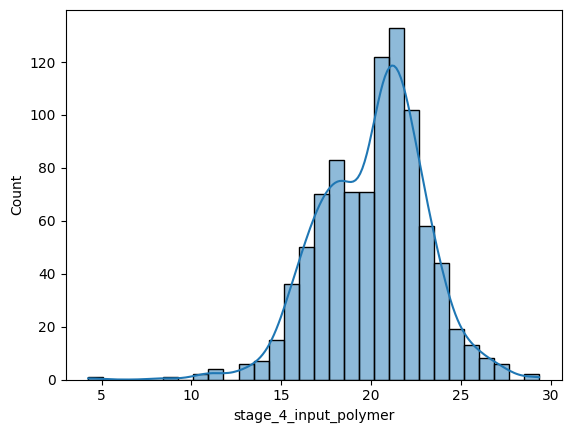

In [19]:
print(df['stage_4_input_polymer'].mean())
print(df['stage_4_input_polymer'].median())
sns.histplot(df['stage_4_input_polymer'], kde=True, bins=30)

Похоже на нормальное, можно средним

In [20]:
df['stage_4_input_polymer'] = df['stage_4_input_polymer'].fillna(df['stage_4_input_polymer'].mean())
df['stage_4_input_polymer'].isna().sum()

0

stage_4_input_overheated_steam подача перегретого пара, в м3

In [21]:
df[df['stage_4_input_overheated_steam'].isna()]

,datetime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,stage_2_output_top_temp,...,stage_3_output_temp_hum_steam,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift
272,2021-11-30 14:00:00,73.63,88.81,331.36,76.15,110.18,51.13,392.81,220.80,94.32,...,107.89,46.48,NaN,21.14,6.12,297.58,0.15,23.68,46.61,1.0
464,2022-03-06 09:00:00,74.93,113.09,342.37,76.68,94.44,56.32,392.39,258.79,94.85,...,119.47,41.19,NaN,21.23,6.19,308.43,0.20,24.28,31.59,1.0


153.30983905579401
153.165


<Axes: xlabel='stage_4_input_overheated_steam', ylabel='Count'>

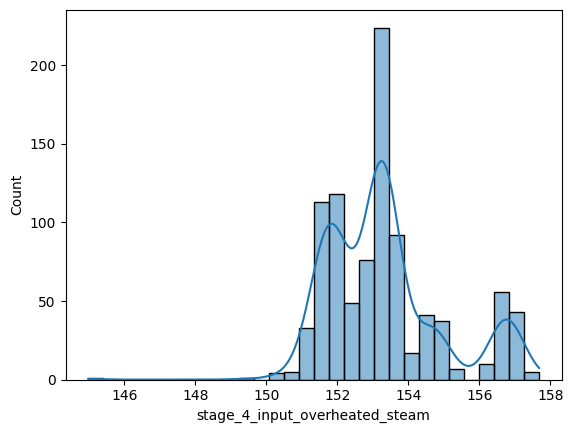

In [22]:
print(df['stage_4_input_overheated_steam'].mean())
print(df['stage_4_input_overheated_steam'].median())
sns.histplot(df['stage_4_input_overheated_steam'], kde=True, bins=30)

Есть какая- то анамалия, но в целом норм....

In [23]:
df['stage_4_input_overheated_steam'] = df['stage_4_input_overheated_steam'].fillna(df['stage_4_input_overheated_steam'].mean())
df['stage_4_input_overheated_steam'].isna().sum()

0

### Распределние

<Axes: xlabel='stage_1_output_konv_avd', ylabel='Density'>

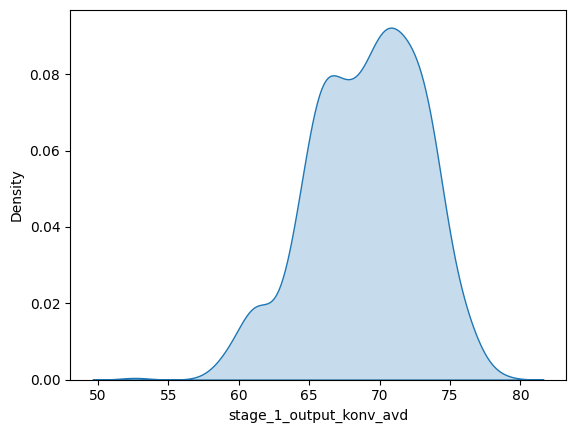

In [24]:
sns.kdeplot(data=df, x='stage_1_output_konv_avd', fill=True)

<Axes: xlabel='stage_2_input_water_sum', ylabel='Density'>

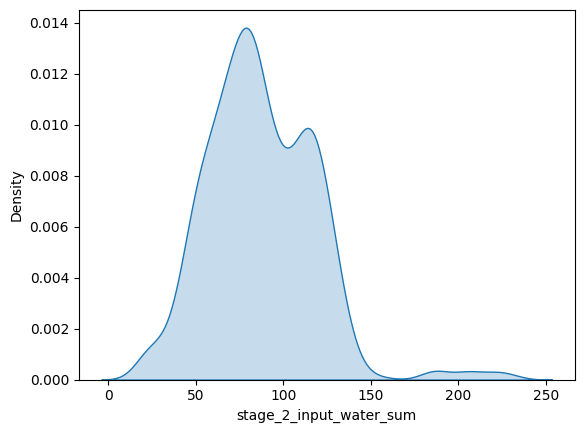

In [25]:
sns.kdeplot(data=df, x='stage_2_input_water_sum', fill=True)

<Axes: xlabel='stage_2_output_bottom_pressure', ylabel='Density'>

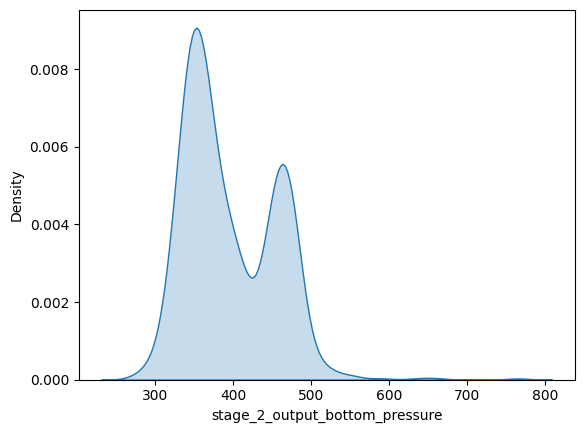

In [26]:
sns.kdeplot(data=df, x='stage_2_output_bottom_pressure', fill=True)

<Axes: xlabel='stage_2_output_bottom_temp', ylabel='Density'>

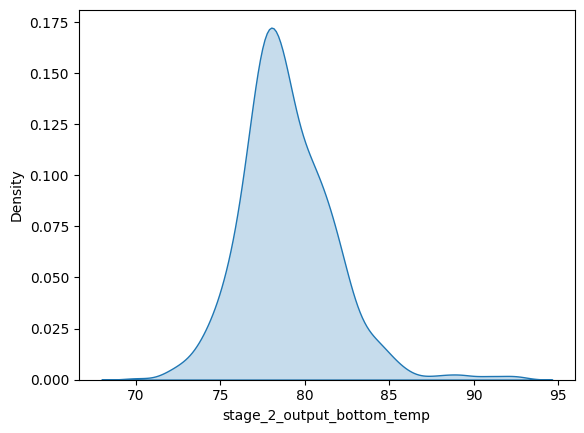

In [27]:
sns.kdeplot(data=df, x='stage_2_output_bottom_temp', fill=True)

<Axes: xlabel='stage_2_output_top_pressure', ylabel='Density'>

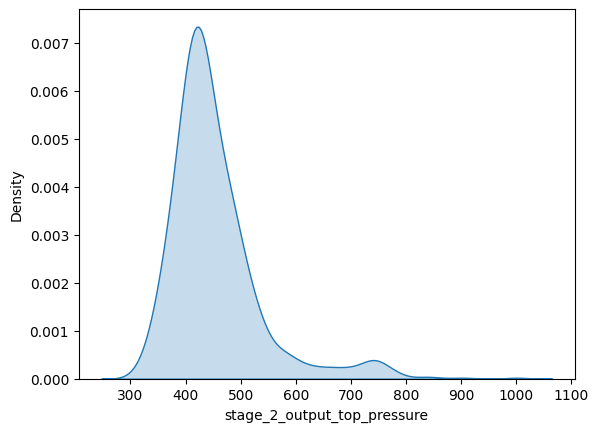

In [28]:
sns.kdeplot(data=df, x='stage_2_output_top_pressure', fill=True)

<Axes: xlabel='stage_2_output_top_pressure_at_end', ylabel='Density'>

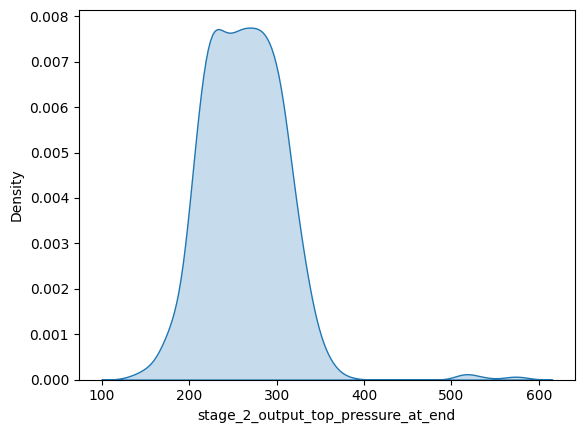

In [29]:
sns.kdeplot(data=df, x='stage_2_output_top_pressure_at_end', fill=True)

<Axes: xlabel='stage_3_input_pressure', ylabel='Density'>

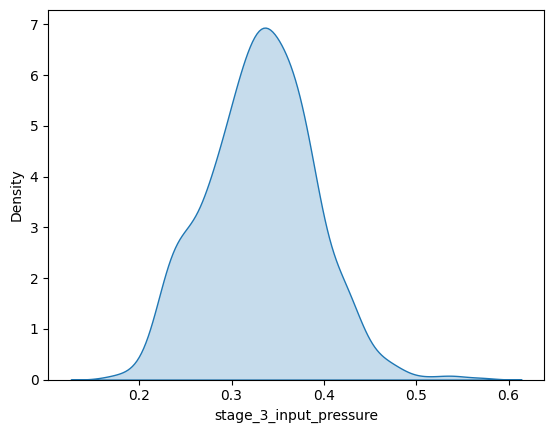

In [30]:
sns.kdeplot(data=df, x='stage_3_input_pressure', fill=True)

<Axes: xlabel='stage_3_output_temp_hum_steam', ylabel='Density'>

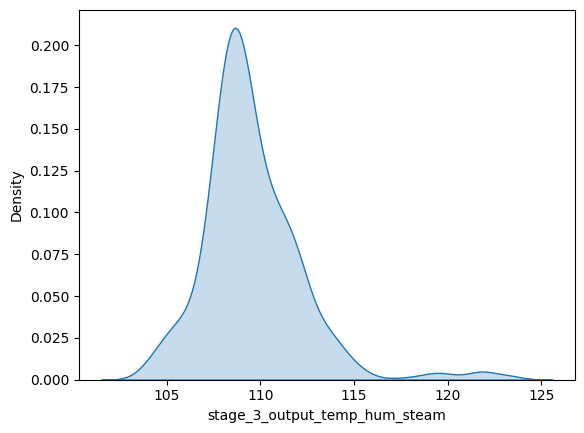

In [31]:
sns.kdeplot(data=df, x='stage_3_output_temp_hum_steam', fill=True)

<Axes: xlabel='stage_3_output_temp_top', ylabel='Density'>

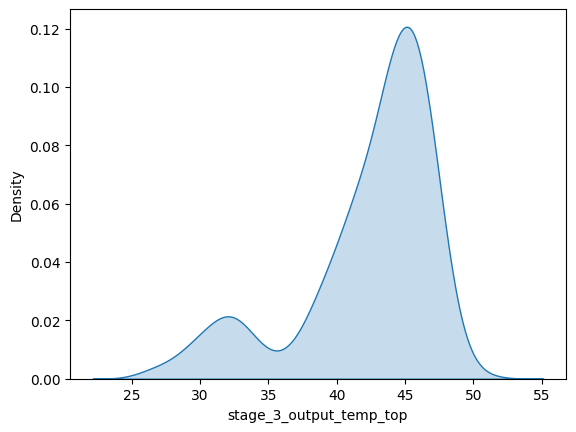

In [32]:
sns.kdeplot(data=df, x='stage_3_output_temp_top', fill=True)

<Axes: xlabel='stage_4_input_overheated_steam', ylabel='Density'>

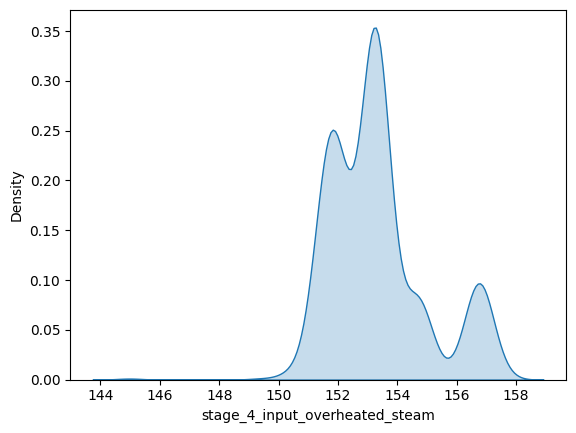

In [33]:
sns.kdeplot(data=df, x='stage_4_input_overheated_steam', fill=True)

<Axes: xlabel='stage_4_output_danger_gas', ylabel='Density'>

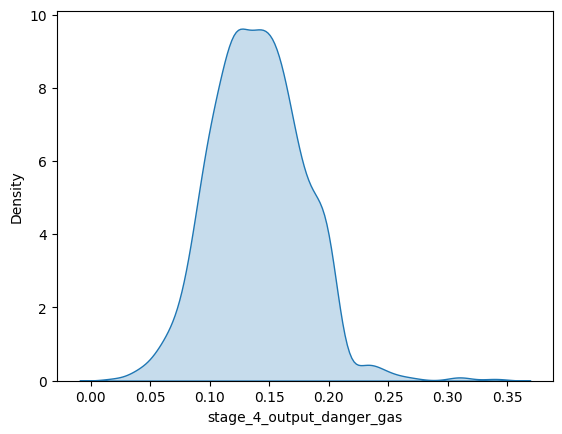

In [34]:
sns.kdeplot(data=df, x='stage_4_output_danger_gas', fill=True)

In [35]:
outlier_mask = False
nan_mask = df['stage_4_output_danger_gas'].isna()
print(nan_mask)
for col in df.select_dtypes(include=np.number).columns:
    if col == 'stage_4_output_danger_gas':
        continue
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outlier_mask = outlier_mask | ((df[col] < lower_bound) | (df[col] > upper_bound))

# 3. Комбинируем условия
final_mask = nan_mask & outlier_mask
# 4. Количество таких строк:
count = final_mask.sum()
print("Количество строк:", count)
#если нет

0      False
1      False
2      False
3      False
4      False
       ...  
929    False
930    False
931    False
932    False
933    False
Name: stage_4_output_danger_gas, Length: 934, dtype: bool
Количество строк: 0


In [36]:
outlier_mask = False
nan_mask = df['stage_4_output_danger_gas'].notna()
for col in df.select_dtypes(include=np.number).columns:
    if col == 'stage_4_output_danger_gas':
        continue
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outlier_mask = outlier_mask | ((df[col] < lower_bound) | (df[col] > upper_bound))

# 3. Комбинируем условия
final_mask = nan_mask & outlier_mask

# 4. Количество таких строк:
count = final_mask.sum()
print("Количество строк:", count)
#если есть

Количество строк: 509


In [37]:

#Этой штукой я искал выбрался. Да не очень правильно, но ладно
print(df.shape)
for i in df.columns[1:]:
    curr_df = df[i].describe()
    H = curr_df.iloc[6] - curr_df.iloc[4]
    no_upper_light = curr_df.iloc[4] + H * 3
    no_lower_light = curr_df.iloc[6] - H * 3

    no_upper_hard = curr_df.iloc[4] + H * 6
    no_lower_hard = curr_df.iloc[6] - H * 6
    len_i = len(i)
    res_1 = df[((df[i] >= no_upper_hard) | (df[i] <= no_lower_hard)) & (df['stage_4_output_danger_gas'].isna())][i]
    if len(res_1) != 0:
        print(f'{i}{(40 - len_i) * " "}{len(res_1)} СУПЕР ВЫБРОС')
    
    res_2 = df[(df[i] >= no_upper_light) | (df[i] <= no_lower_light) & (df['stage_4_output_danger_gas'].isna())][i]
    if len(res_2) != 0: 
        print(f'{i}{(40 - len_i) * " "}{len(res_2)} СЛАБЫЙ ВЫБРОС')
    print(' ')
    #без газа с выбросами - те данные которые мы в праве дропнуть(в теории) 
    #после того, как определим кол во строк с выбросами БЕЗ danger gas. Попробуем удалим
    #Пересмотреть варианты заполнения при ненормальном распределении...
    #Обучим несколько регрессионок. Условно: с выбросами, без выбросами...

(934, 24)
 
stage_2_input_water_sum                 11 СЛАБЫЙ ВЫБРОС
 
stage_2_output_bottom_pressure          2 СЛАБЫЙ ВЫБРОС
 
stage_2_output_bottom_temp              11 СЛАБЫЙ ВЫБРОС
 
 
stage_2_output_bottom_vacuum            22 СЛАБЫЙ ВЫБРОС
 
stage_2_output_top_pressure             46 СЛАБЫЙ ВЫБРОС
 
stage_2_output_top_pressure_at_end      6 СЛАБЫЙ ВЫБРОС
 
stage_2_output_top_temp                 3 СЛАБЫЙ ВЫБРОС
 
 
stage_3_input_pressure                  3 СЛАБЫЙ ВЫБРОС
 
stage_3_input_soft_water                3 СЛАБЫЙ ВЫБРОС
 
 
stage_3_output_temp_hum_steam           21 СЛАБЫЙ ВЫБРОС
 
 
stage_4_input_overheated_steam          12 СЛАБЫЙ ВЫБРОС
 
 
 
stage_4_input_water                     12 СЛАБЫЙ ВЫБРОС
 
stage_4_output_danger_gas               3 СЛАБЫЙ ВЫБРОС
 
 
 
 


In [38]:
#Тыкаюсь с выбросами

#Этой штукой я искал выбрался. Да не очень правильно, но ладно
print(df.shape)
for i in df.columns[1:]:
    curr_df = df[i].describe()
    H = curr_df.iloc[6] - curr_df.iloc[4]
    no_upper_light = curr_df.iloc[4] + H * 3
    no_lower_light = curr_df.iloc[6] - H * 3

    no_upper_hard = curr_df.iloc[4] + H * 6
    no_lower_hard = curr_df.iloc[6] - H * 6

    len_i = len(i)
    res_1 = df[((df[i] >= no_upper_hard) | (df[i] <= no_lower_hard)) & (df['stage_4_output_danger_gas'].isna())][i]
    if len(res_1) != 0:
        print(f'{i}{(40 - len_i) * " "}{len(res_1)} СУПЕР ВЫБРОС')
        df = df[(df[i] < no_upper_hard) & (df[i] > no_lower_hard)]
    
    res_2 = df[(df[i] >= no_upper_light) | (df[i] <= no_lower_light) & (df['stage_4_output_danger_gas'].isna())][i]
    if len(res_2) != 0: 
        print(f'{i}{(40 - len_i) * " "}{len(res_2)} СЛАБЫЙ ВЫБРОС')
        df = df[(df[i] < no_upper_hard) & (df[i] > no_lower_light)]
    print(' ')
#Думаю что в выбрасывать по нижней границе грустно, неправильно и печально


fqw = ['stage_2_input_water_sum', 'stage_2_output_bottom_pressure', 'stage_2_output_bottom_temp', 'stage_2_output_bottom_temp_hum_steam', 'stage_2_output_bottom_vacuum', 'stage_2_output_top_pressure', 'stage_2_output_top_pressure_at_end', 'stage_2_output_top_temp', 'stage_3_input_pressure', 'stage_3_input_soft_water', 'stage_3_output_temp_hum_steam', 'stage_4_input_overheated_steam', 'stage_4_input_water', 'stage_4_output_danger_gas']

#Таааакс что мы тут видим.
#Те у которых нет выбросов:
# *stage_1_output_konv_avd
# *stage_2_output_top_vacuum
# *stage_3_input_steam
# *stage_3_output_temp_top
# *stage_4_input_polymer
# *stage_4_input_steam
# *stage_4_output_dry_residue_avg
# *stage_4_output_product
# *work_shift



fqq = ['stage_2_input_water_sum', 'stage_2_output_bottom_pressure', 'stage_2_output_bottom_temp', 'stage_2_output_bottom_temp_hum_steam', 'stage_2_output_bottom_vacuum', 'stage_2_output_top_pressure', 'stage_2_output_top_pressure_at_end', 'stage_2_output_top_temp', 'stage_3_input_pressure', 'stage_3_input_soft_water', 'stage_3_output_temp_hum_steam', 'stage_4_input_overheated_steam', 'stage_4_input_water', 'stage_4_output_danger_gas']

#Всего 4240 данных, тогда стоит подумать много ли подобных данны чтобы их удалить? заменить? что стоит вообще сделать?
#Проверю данных на нормальность 

#Те у кого есть выбросы (выброс кол-во выбросов):
# *stage_2_input_water_sum              63   
# *stage_2_output_bottom_pressure       10  
# *stage_2_output_bottom_temp           70  
# *stage_2_output_bottom_temp_hum_steam 1   
# *stage_2_output_bottom_vacuum         76  
# *stage_2_output_top_pressure          121 
# *stage_2_output_top_pressure_at_end   16  
# *stage_2_output_top_temp              6   
# *stage_3_input_pressure               10  
# *stage_3_input_soft_water             15  
# *stage_3_output_temp_hum_steam        108 
# *stage_4_input_overheated_steam       6   
# *stage_4_input_water                  46  
# *stage_4_output_danger_gas            4   


koalit = []
for i in df.columns[1:]:
    _, res = shapiro(df[i])
    if res >= 0.05:
        koalit.append([i, 'нормальное'])
    else:
        koalit.append([i, 'ненормальное'])
print(koalit)
#Все ненормальные...ну из графиков конечно было очевидно, тогда думаю логично было бы выбросы ЕСЛИ И ЗАМЕНЯТЬ, то делать это медианой....
#Нужно будет подумать

#Я щас не искал верхние и нижние границы. НЕ ЗАБЫТЬ!!!!!!!!!!!

(934, 24)
 
stage_2_input_water_sum                 11 СЛАБЫЙ ВЫБРОС
 
stage_2_output_bottom_pressure          2 СЛАБЫЙ ВЫБРОС
 
stage_2_output_bottom_temp              11 СЛАБЫЙ ВЫБРОС
 
 
stage_2_output_bottom_vacuum            23 СЛАБЫЙ ВЫБРОС
 
stage_2_output_top_pressure             41 СЛАБЫЙ ВЫБРОС
 
stage_2_output_top_pressure_at_end      6 СЛАБЫЙ ВЫБРОС
 
 
 
stage_3_input_pressure                  4 СЛАБЫЙ ВЫБРОС
 
stage_3_input_soft_water                2 СЛАБЫЙ ВЫБРОС
 
 
stage_3_output_temp_hum_steam           19 СЛАБЫЙ ВЫБРОС
 
 
stage_4_input_overheated_steam          9 СЛАБЫЙ ВЫБРОС
 
 
 
stage_4_input_water                     12 СЛАБЫЙ ВЫБРОС
 
stage_4_output_danger_gas               5 СЛАБЫЙ ВЫБРОС
 
 
 
 
[['stage_1_output_konv_avd', 'ненормальное'], ['stage_2_input_water_sum', 'ненормальное'], ['stage_2_output_bottom_pressure', 'ненормальное'], ['stage_2_output_bottom_temp', 'ненормальное'], ['stage_2_output_bottom_temp_hum_steam', 'ненормальное'], ['stage_2_output_

<Axes: >

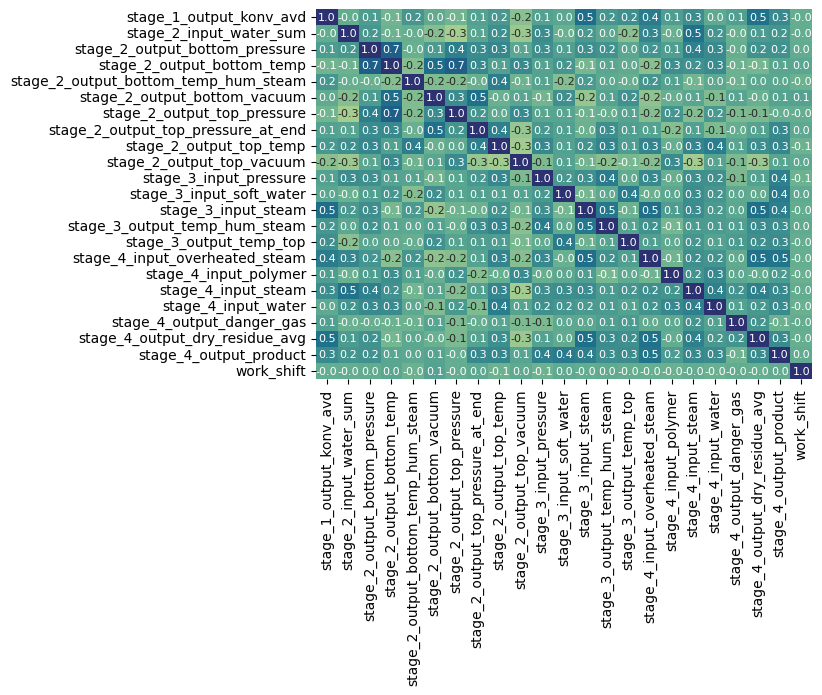

In [39]:
spec_df = df.drop('datetime', axis=1)

correlation_matrix = spec_df.corr(method='spearman')
# по приколу хочу глянуть матрицу корреляций...можно за одно heatmap составить
sns.heatmap(correlation_matrix, cmap="crest", fmt='.1f', cbar=False, annot=True, annot_kws={"size": 8})

# стоит ли добавлять work_shift в матрицу корреляций???

#stage_2_output_bottom_temp + stage_2_output_bottom_temp           0.6
#stage_2_output_top_pressure + stage_2_output_bottom_temp          0.7
#stage_2_output_bottom_vacuum + stage_2_output_top_pressure_at_end 0.6
#stage_4_input_steam + stage_2_input_water_sum                     0.5
#stage_4_output_dry_residue_avg + stage_1_output_konv_avd          0.5
#stage_4_output_dry_residue_avg + stage_3_input_steam              0.5

#глаза слипаются не дам быструю аналитику вот этого, разберайтеся сами утром.
#гипотезы щас не придумаю сорян....
#

#корреляция выбросов с итоговым продуктом/вредным газом
#насколько мало danger_gas
#насколько больше выбросы
#проверить правильний ли метод используется корреляции для work_shift

Гипотезы: Одна из смен допускает ошибки: (в порциях веществ)

Идеи для проверки: (определенные этапы(условно первые 2) могут влияют в больше на danger_gas)

#### Расчеты 

In [40]:
#создать новую кат. на основе dan_gas
df['danger_gas_kat'] = df['stage_4_output_danger_gas'].apply(
    lambda x: 1 if x < 0.05 else (2 if x >= 0.05 and x < 0.16 else 3))

df

,datetime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,stage_2_output_top_temp,...,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift,danger_gas_kat
0,2021-01-28 21:00:00,67.93,90.24,473.59,75.26,97.79,49.33,356.74,249.87,97.50,...,45.87,156.41,19.36,5.97,339.99,0.16,21.48,46.01,2.0,3
1,2021-01-29 01:00:00,71.23,105.97,475.01,76.90,98.28,51.24,370.37,260.85,98.14,...,45.74,156.46,22.93,5.73,319.95,0.15,21.98,52.55,2.0,2
2,2021-01-29 08:00:00,68.83,106.60,471.56,76.74,NaN,49.14,359.06,248.59,NaN,...,46.10,156.18,17.95,5.73,258.98,0.13,22.58,42.99,1.0,2
3,2021-01-29 21:00:00,68.73,104.05,465.82,75.31,96.24,45.14,341.09,224.87,96.27,...,45.84,156.62,15.20,5.88,319.02,0.14,20.78,43.67,1.0,2
4,2021-01-30 01:00:00,66.03,103.28,468.38,77.53,96.48,52.44,373.44,267.24,96.80,...,45.99,156.51,18.52,5.71,297.12,0.15,21.28,47.43,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,2023-03-18 12:00:00,66.03,43.26,357.13,78.20,101.68,59.09,667.32,145.22,94.28,...,47.98,153.93,17.02,3.64,425.24,0.11,20.18,21.05,2.0,2
929,2023-03-19 12:00:00,67.33,43.32,409.32,82.00,105.65,69.35,771.29,223.71,97.37,...,41.04,152.90,22.69,4.14,381.37,0.20,21.18,9.17,2.0,3
930,2023-03-20 00:00:00,68.83,62.24,377.84,79.82,104.80,61.08,781.76,183.36,97.70,...,46.40,152.53,21.38,4.15,381.77,0.14,21.08,10.79,2.0,2
931,2023-03-20 12:00:00,66.83,61.92,397.95,81.19,105.50,66.26,776.52,227.64,98.31,...,45.99,152.53,21.78,4.14,391.60,0.20,21.08,9.27,1.0,3


In [41]:
df['datetime'] = df['datetime'].apply(lambda x: x.split(' ')[0])

In [42]:

# group = df.groupby((df.columns[:-1]))
# print(group)
a = df.columns[:-1]
group_df = df[a].groupby(df['datetime'], level=0, group_keys=False).sum()
group_df
# table = pd.crosstab((df.colums()[:-1]))
# table
# просуммируем datatime с одинаковыми datatime

,datetime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,stage_2_output_top_temp,...,stage_3_output_temp_hum_steam,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift
0,2021-01-28,67.93,90.24,473.59,75.26,97.79,49.33,356.74,249.87,97.50,...,108.63,45.87,156.41,19.36,5.97,339.99,0.16,21.48,46.01,2.0
1,2021-01-29,71.23,105.97,475.01,76.90,98.28,51.24,370.37,260.85,98.14,...,108.26,45.74,156.46,22.93,5.73,319.95,0.15,21.98,52.55,2.0
2,2021-01-29,68.83,106.60,471.56,76.74,0.00,49.14,359.06,248.59,0.00,...,109.49,46.10,156.18,17.95,5.73,258.98,0.13,22.58,42.99,1.0
3,2021-01-29,68.73,104.05,465.82,75.31,96.24,45.14,341.09,224.87,96.27,...,108.08,45.84,156.62,15.20,5.88,319.02,0.14,20.78,43.67,1.0
4,2021-01-30,66.03,103.28,468.38,77.53,96.48,52.44,373.44,267.24,96.80,...,109.20,45.99,156.51,18.52,5.71,297.12,0.15,21.28,47.43,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,2023-03-18,66.03,43.26,357.13,78.20,101.68,59.09,667.32,145.22,94.28,...,112.85,47.98,153.93,17.02,3.64,425.24,0.11,20.18,21.05,2.0
929,2023-03-19,67.33,43.32,409.32,82.00,105.65,69.35,771.29,223.71,97.37,...,111.26,41.04,152.90,22.69,4.14,381.37,0.20,21.18,9.17,2.0
930,2023-03-20,68.83,62.24,377.84,79.82,104.80,61.08,781.76,183.36,97.70,...,110.09,46.40,152.53,21.38,4.15,381.77,0.14,21.08,10.79,2.0
931,2023-03-20,66.83,61.92,397.95,81.19,105.50,66.26,776.52,227.64,98.31,...,108.65,45.99,152.53,21.78,4.14,391.60,0.20,21.08,9.27,1.0
